In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [17]:
df= pd.read_csv("supermarket_sales.csv")

print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Shape: (2000, 14)

Columns:
 Index(['Invoice_ID', 'Branch', 'City', 'Customer_Type', 'Gender',
       'Product_Line', 'Unit_Price', 'Quantity', 'Tax', 'Total', 'Date',
       'Time', 'Payment', 'Rating'],
      dtype='object')

First 5 rows:
   Invoice_ID Branch       City Customer_Type  Gender         Product_Line  \
0  INV000001      B   Mandalay        Member    Male     Food & Beverages   
1  INV000002      C   Mandalay        Member  Female     Food & Beverages   
2  INV000003      C  Naypyitaw        Normal  Female  Fashion Accessories   
3  INV000004      B  Naypyitaw        Member  Female     Food & Beverages   
4  INV000005      C     Yangon        Normal  Female     Food & Beverages   

   Unit_Price  Quantity   Tax   Total        Date   Time      Payment  Rating  
0       69.36         3  7.28  119.58  2023-08-08  18:54  Credit card     8.4  
1       35.25         1  6.62  137.13  2023-02-09  18:44  Credit card     4.3  
2       57.56         8  4.66  490.48  2023-08-24  16:

# Data Cleaning

In [4]:
df.isnull().sum()

Invoice_ID       0
Branch           0
City             0
Customer_Type    0
Gender           0
Product_Line     0
Unit_Price       0
Quantity         0
Tax              0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df

,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Rating
0,INV000001,B,Mandalay,Member,Male,Food & Beverages,69.36,3,7.28,119.58,2023-08-08,18:54,Credit card,8.4
1,INV000002,C,Mandalay,Member,Female,Food & Beverages,35.25,1,6.62,137.13,2023-02-09,18:44,Credit card,4.3
2,INV000003,C,Naypyitaw,Normal,Female,Fashion Accessories,57.56,8,4.66,490.48,2023-08-24,16:16,Cash,9.6
3,INV000004,B,Naypyitaw,Member,Female,Food & Beverages,16.60,5,8.57,142.54,2023-02-09,11:35,Cash,4.5
4,INV000005,C,Yangon,Normal,Female,Food & Beverages,49.07,1,3.70,24.43,2023-07-04,8:56,Credit card,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,INV001996,C,Yangon,Member,Female,Sports & Travel,57.65,9,1.45,69.66,2023-06-29,19:14,Cash,7.7
1996,INV001997,A,Yangon,Member,Female,Fashion Accessories,96.38,4,7.32,139.45,2023-04-08,13:48,Credit card,6.4
1997,INV001998,C,Yangon,Member,Female,Home & Lifestyle,23.31,7,4.88,289.58,2023-03-24,12:26,Cash,4.2
1998,INV001999,C,Yangon,Normal,Female,Food & Beverages,71.82,4,5.50,400.04,2023-10-04,10:35,Cash,8.3


In [7]:
df.drop_duplicates(inplace=True)

In [10]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Then extract month
df['Month'] = df['Date'].dt.month

# Check result
df.head()


,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Rating,Month
0,INV000001,B,Mandalay,Member,Male,Food & Beverages,69.36,3,7.28,119.58,2023-08-08,18:54,Credit card,8.4,8
1,INV000002,C,Mandalay,Member,Female,Food & Beverages,35.25,1,6.62,137.13,2023-02-09,18:44,Credit card,4.3,2
2,INV000003,C,Naypyitaw,Normal,Female,Fashion Accessories,57.56,8,4.66,490.48,2023-08-24,16:16,Cash,9.6,8
3,INV000004,B,Naypyitaw,Member,Female,Food & Beverages,16.60,5,8.57,142.54,2023-02-09,11:35,Cash,4.5,2
4,INV000005,C,Yangon,Normal,Female,Food & Beverages,49.07,1,3.70,24.43,2023-07-04,8:56,Credit card,5.8,7


In [11]:
df['Day'] = df['Date'].dt.day_name()

In [13]:
df['Day']

0         Tuesday
1        Thursday
2        Thursday
3        Thursday
4         Tuesday
          ...    
1995     Thursday
1996     Saturday
1997       Friday
1998    Wednesday
1999    Wednesday
Name: Day, Length: 2000, dtype: object

# Daily Sales Trend

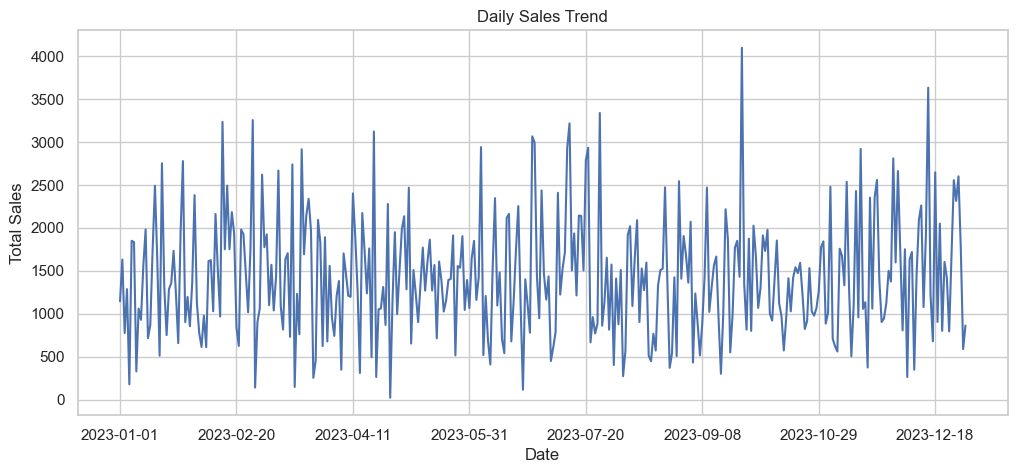

In [19]:
daily_sales = df.groupby('Date')['Total'].sum()

plt.figure(figsize=(12,5))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


# Best Selling Product Line

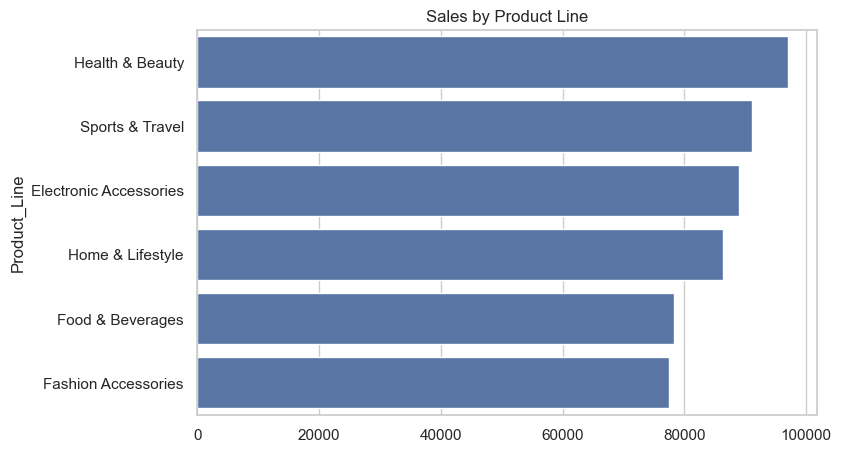

In [21]:
product_sales = df.groupby('Product_Line')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title("Sales by Product Line")
plt.show()

# Sales by Day of Week

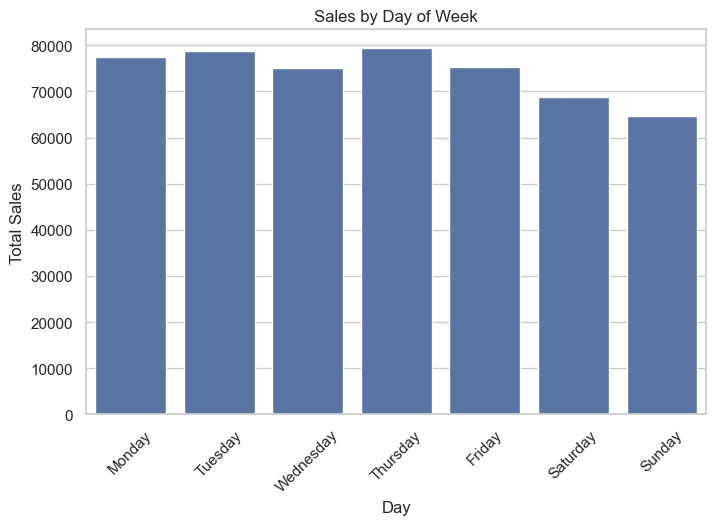

In [23]:
# Step 1: Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Create Day of Week column
df['Day_of_Week'] = df['Date'].dt.day_name()

# Step 3: Group by Day of Week
day_sales = df.groupby('Day_of_Week')['Total'].sum()

# Step 4: Arrange days in correct order
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_sales = day_sales.reindex(order)

# Step 5: Plot
plt.figure(figsize=(8,5))
sns.barplot(x=day_sales.index, y=day_sales.values)
plt.title("Sales by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


# Customer Spending Pattern

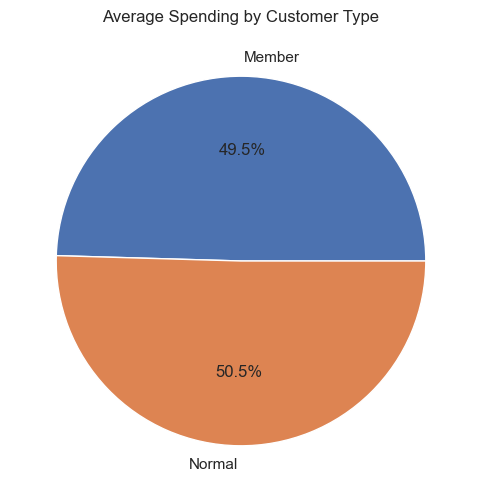

In [25]:
customer_spending = df.groupby('Customer_Type')['Total'].mean()

customer_spending.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Average Spending by Customer Type")
plt.ylabel("")
plt.show()


# Correlation Heatmap

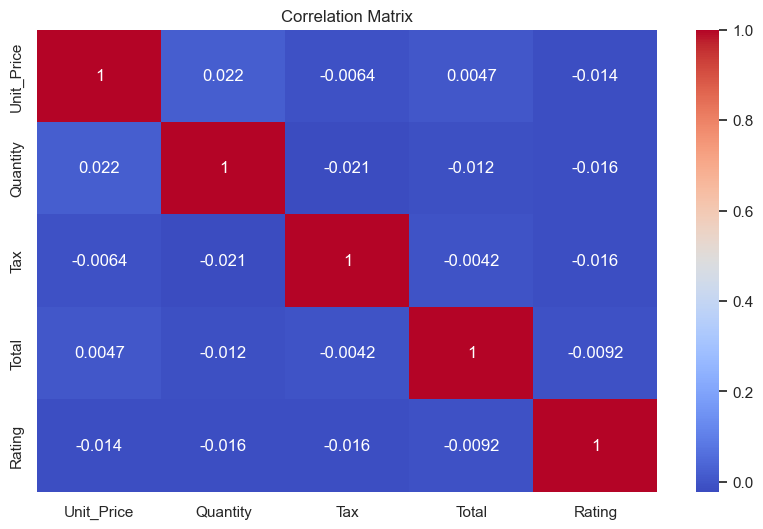

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Statistical Insights

In [29]:
print("Mean Sales:", df['Total'].mean())
print("Median Sales:", df['Total'].median())
print("Max Sales:", df['Total'].max())
print("Correlation between Quantity and Total:", df['Quantity'].corr(df['Total']))


Mean Sales: 259.640345
Median Sales: 258.03999999999996
Max Sales: 499.91
Correlation between Quantity and Total: -0.012458938413830974
